**DBSCAN vs OPTICS Clustering:**
DBSCAN and OPTICS are both density-based clustering algorithms that group together data points that are close to each other in the feature space. However, there are some differences between the two algorithms in terms of performance and scalability:

# *DBSCAN:*

Estimates the density by counting the number of points in a fixed-radius neighborhood or Eps and deems that two points are connected only if they lie within each other's neighborhood.
Uses two parameters such as Eps and MinPts. Eps denotes the Eps-neighborhood of a point and MinPts denotes the minimum number of points required to form a dense region.  
--> Can find arbitrary shaped clusters using MinPts parameters.  
--> The order of the point in the database is insensitive.  
--> Handles noise and outliers.  
--> Cannot perform well with large differences in densities.  
--> Requires less memory than OPTICS.

# *OPTICS:*
 Ordering Points To Identify the Clustering Structure (OPTICS)

Works like an extension of DBSCAN but 'does not' assign cluster memberships but stores the order in which points are processed.  
--> Generates an enhanced order of the data collection structure.  
--> Can extract clusters of varying densities and shapes.  
--> Does not require to set the number of clusters in advance.  
--> Requires more memory than DBSCAN as it maintains a *priority queue* (Min Heap) to determine the next data point which is closest to the point currently being processed in terms of Reachability Distance.
Requires more computational power because the nearest neighbor queries are more complicated than radius queries in DBSCAN.
  
In summary,**DBSCAN is a good choice** for datasets with **arbitrary shaped clusters and handles noise and outliers** well. On the other hand, OPTICS is more flexible in selecting the number of clusters and can extract clusters of varying densities and shapes. However, it requires more memory and computational power than DBSCAN.

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import DBSCAN, OPTICS
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors
from kneed import KneeLocator

In [ ]:


# Load the iris dataset
df = sns.load_dataset('iris')

# Selecting X to perform clustering
# Here, we'll use all four X
X = df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']].values

# Normalize the X
X = StandardScaler().fit_transform(X)

# Apply DBSCAN
dbscan = DBSCAN(eps=0.6, min_samples=5)
dbscan_labels = dbscan.fit_predict(X)

# Apply OPTICS
optics = OPTICS(min_samples=5)
optics_labels = optics.fit_predict(X)

Suggested value of eps: 0.4760712736677158


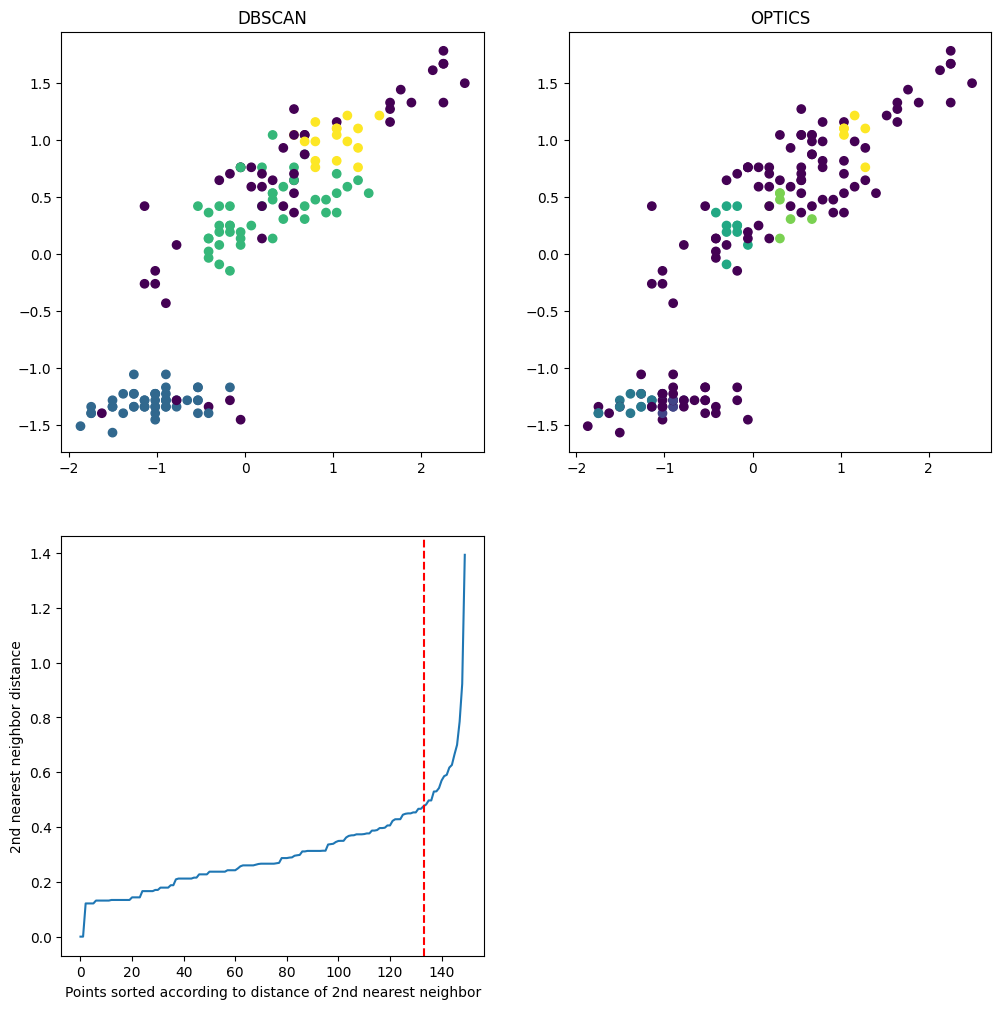

In [8]:
#Plotting the results

plt.figure(figsize=(12,12))
# DBSCAN plot
# For visualization purpose, let's use first two X (sepal_length and sepal_width)
plt.subplot(2,2,1)
plt.scatter(X[:, 0], X[:, 2], c=dbscan_labels)
plt.title('DBSCAN')

# OPTICS plot
# For visualization purpose, let's use first two X (sepal_length and sepal_width)
plt.subplot(2,2,2)
plt.scatter(X[:, 0], X[:, 2], c=optics_labels)
plt.title('OPTICS')

# for best hyperparameter

# Find the nearest neighbors
neigh = NearestNeighbors(n_neighbors=3)
nbrs = neigh.fit(X)
distances, indices = nbrs.kneighbors(X)

# Sort the distances
distances = np.sort(distances, axis=0)
distances = distances[:,1]


# Identify the "elbow" in the k-distance plot
kneedle = KneeLocator(range(1,len(distances)+1), distances, S=1.0, curve='convex', direction='increasing')
elbow_index = kneedle.elbow
# Print the value of 'eps'
print('Suggested value of eps:', distances[elbow_index])

plt.subplot(2,2,3)
# Plot the k-distance plot
plt.plot(distances)
plt.xlabel('Points sorted according to distance of 2nd nearest neighbor')
plt.ylabel('2nd nearest neighbor distance')
# Add a vertical line at the "elbow" point
plt.axvline(x=elbow_index, color='r', linestyle='--')
plt.show()

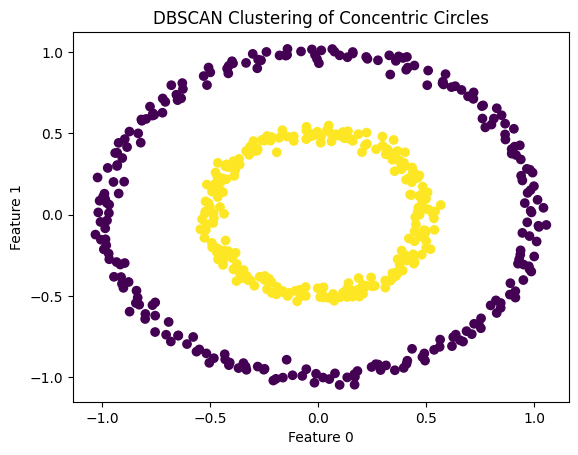

In [3]:
from sklearn.datasets import make_circles


# Create a concentric circle dataset
X, _ = make_circles(n_samples=500, factor=.5, noise=.03, random_state=4)

# Apply DBSCAN to the dataset
dbscan = DBSCAN(eps=0.1, min_samples=5)
clusters = dbscan.fit_predict(X)

# Plotting
plt.scatter(X[:, 0], X[:, 1], c=clusters, cmap='viridis', marker='o')
plt.title("DBSCAN Clustering of Concentric Circles")
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.show()